##IMPORT LYBRARY 


In [24]:
# Redwan Ratu
# redwanulratu@gmail.com
# Can classify 10 category image with 70% accuracy 

import tensorflow as tf

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D 

import matplotlib.pyplot as plt
import numpy as np

import cv2

##LOAD DATASET

In [2]:
#SPLIT DATASET IN TRAIN AND TEST
(X_train,y_train ),(X_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
print(X_train.shape)
print(X_test.shape)


#converting 2-D metrics to 1-D
y_train = y_train.reshape(-1,)


(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:
#IMAGE CLASSES
classes=[ "airplanes", "cars", "birds", "cats", "deer", "dogs", "frogs", "horses", "ships", "trucks"]

#USER DEFINE FUNCTIONS

In [22]:

#Show image from dataset 

def show_image(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])


#Predicting an image (32 X32)

def predict_image(image):
  image_dim = np.expand_dims(image,0)
  prediction=cnn.predict(image_dim)
  plt.figure(figsize=(15,2))
  plt.imshow(image)
  plt.xlabel(classes[np.argmax(prediction[0])])

#Processing image form predict data / image resize

def preprocessing_for_predict(location):
  img=  cv2.imread(location)/255
  return cv2.resize(img, dsize=(32, 32), interpolation=cv2.INTER_CUBIC)

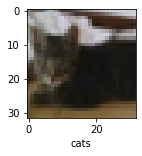

In [6]:
#show a random image
show_image(X_train,y_train,9)

## CNN Model

In [7]:
#Normalize Images
X_train=X_train/255
X_test=X_test/255

#Build Model
cnn= Sequential([

#cnn


Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
MaxPooling2D((2,2)),


Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
MaxPooling2D((2,2)),


#dense                 
Flatten(),
Dense(64,activation='relu'),
Dense(10,activation='softmax')
])


In [8]:
cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [9]:
# summary of the model
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                147520    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

In [10]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.4992 - accuracy: 0.4578
Epoch 2/10
1563/1563 [==============================] - 62s 40ms/step - loss: 1.1366 - accuracy: 0.6012
Epoch 3/10
1563/1563 [==============================] - 62s 40ms/step - loss: 1.0161 - accuracy: 0.6458
Epoch 4/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.9411 - accuracy: 0.6704
Epoch 5/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8781 - accuracy: 0.6947
Epoch 6/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8251 - accuracy: 0.7143
Epoch 7/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7905 - accuracy: 0.7261
Epoch 8/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7449 - accuracy: 0.7409
Epoch 9/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7145 - accuracy: 0.7528
Epoch 10/10
1563/1563 [==============================] - 61s 39m

In [11]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9632 - accuracy: 0.6790


[0.9632275104522705, 0.6790000200271606]

##Predicting Sample image

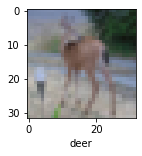

In [12]:
predict_image(X_test[100])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


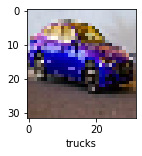

In [25]:
location='/content/download.jpg'
sample_image=preprocessing_for_predict(location)
predict_image(sample_image)